In [1]:
import pandas as pd
import numpy  as np
import warnings
warnings.filterwarnings("ignore")

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.family']='Malgun Gothic'

In [2]:
df= pd.read_csv('main_data.csv',encoding='cp949')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42657 entries, 0 to 42656
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   long                  42657 non-null  float64
 1   lat                   42657 non-null  float64
 2   gu                    42657 non-null  object 
 3   소재지면적                 42657 non-null  float64
 4   near_cafe             42657 non-null  int64  
 5   near_bus              42657 non-null  int64  
 6   near_bus_commute      42657 non-null  int64  
 7   near_bus_transfer     42657 non-null  int64  
 8   near_bus_many         42657 non-null  int64  
 9   near_subway100        42657 non-null  int64  
 10  near_subway600        42657 non-null  int64  
 11  near_subway_commute   42657 non-null  int64  
 12  near_subway_transfer  42657 non-null  int64  
 13  near_subway_many      42657 non-null  int64  
 14  gu_pop                42657 non-null  int64  
 15  gu_work            

In [96]:
df.drop(['long','lat','gu'],axis=1,inplace=True)

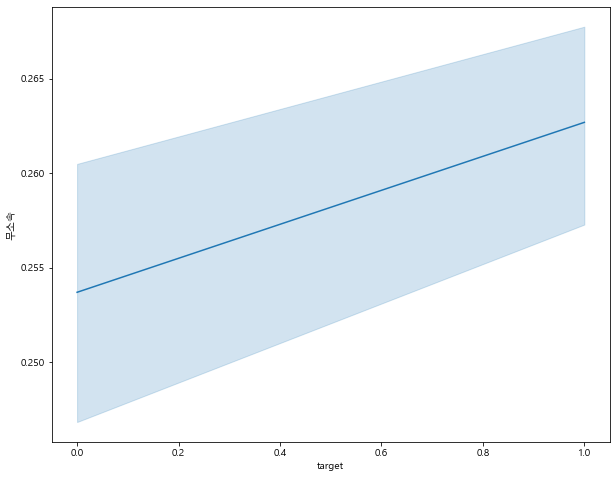

In [70]:
fig = plt.figure(figsize=(10, 8)) 
sns.lineplot(x=df['target'],y=df['무소속'])
plt.show()

In [85]:
# '골목상권','area_cafe','near_subway_commute','gu_density','area_avgTake','area_avgCustomer','near_subway600' 
df2=df.drop(['골목상권','area_cafe','near_subway_commute','gu_density','area_avgTake','area_avgCustomer','near_subway600'],axis=1)
df2_drop_target =df2.drop(['target'],axis=1)

In [92]:
#원본
df3_drop_target =df3.drop(['target'],axis=1)

In [98]:
# '골목상권','발달상권','기타상권','무소속'
df4=df.drop(['골목상권','발달상권','기타상권','무소속'],axis=1)
df4_drop_target =df4.drop(['target'],axis=1)

In [109]:
df5=df.drop(['gu_rate_2030','gu_rate_405060'],axis=1)
df5_drop_target =df5.drop(['target'],axis=1)

In [115]:
df3_drop_target.corr=df3_drop_target.corr()

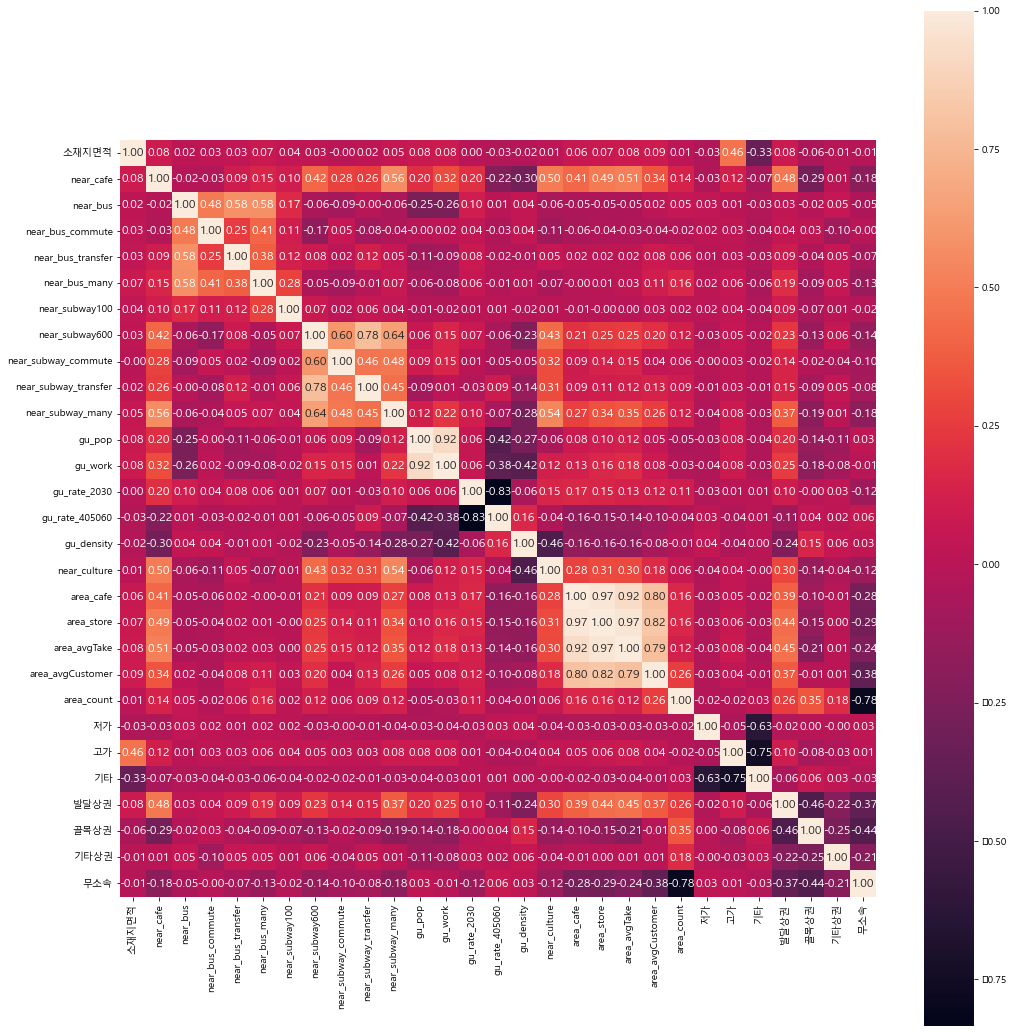

In [160]:
plt.figure(figsize=(15,15))
hm = sns.heatmap(df3_drop_target.corr,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':12},
                yticklabels=df3_drop_target.corr.columns,
                xticklabels=df3_drop_target.corr.columns)
plt.tight_layout()
plt.show()

In [103]:
df2_drop_target.corr=df2_drop_target.corr()

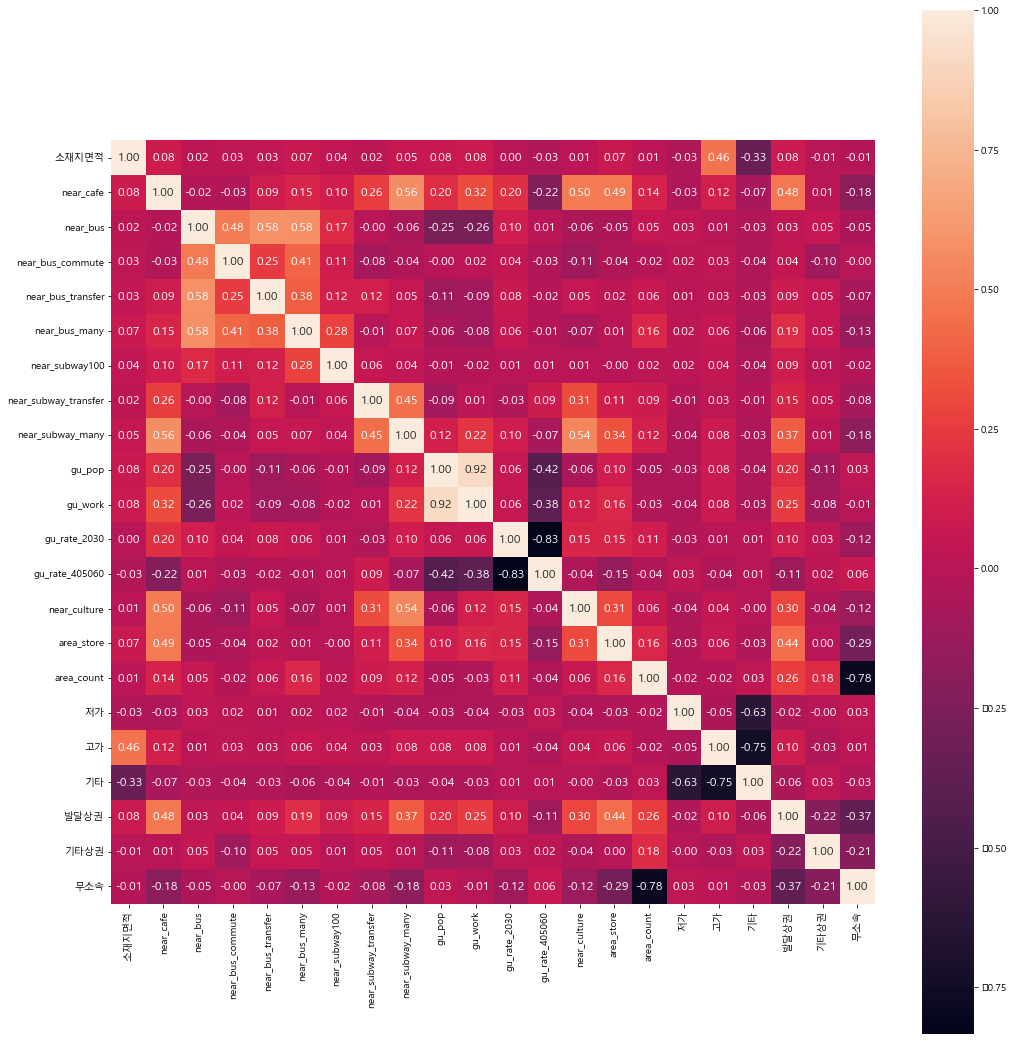

In [161]:
plt.figure(figsize=(15,15))
hm = sns.heatmap(df2_drop_target.corr,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':12},
                yticklabels=df2_drop_target.corr.columns,
                xticklabels=df2_drop_target.corr.columns)
plt.tight_layout()
plt.show()

In [106]:
df4_drop_target.corr=df4_drop_target.corr()

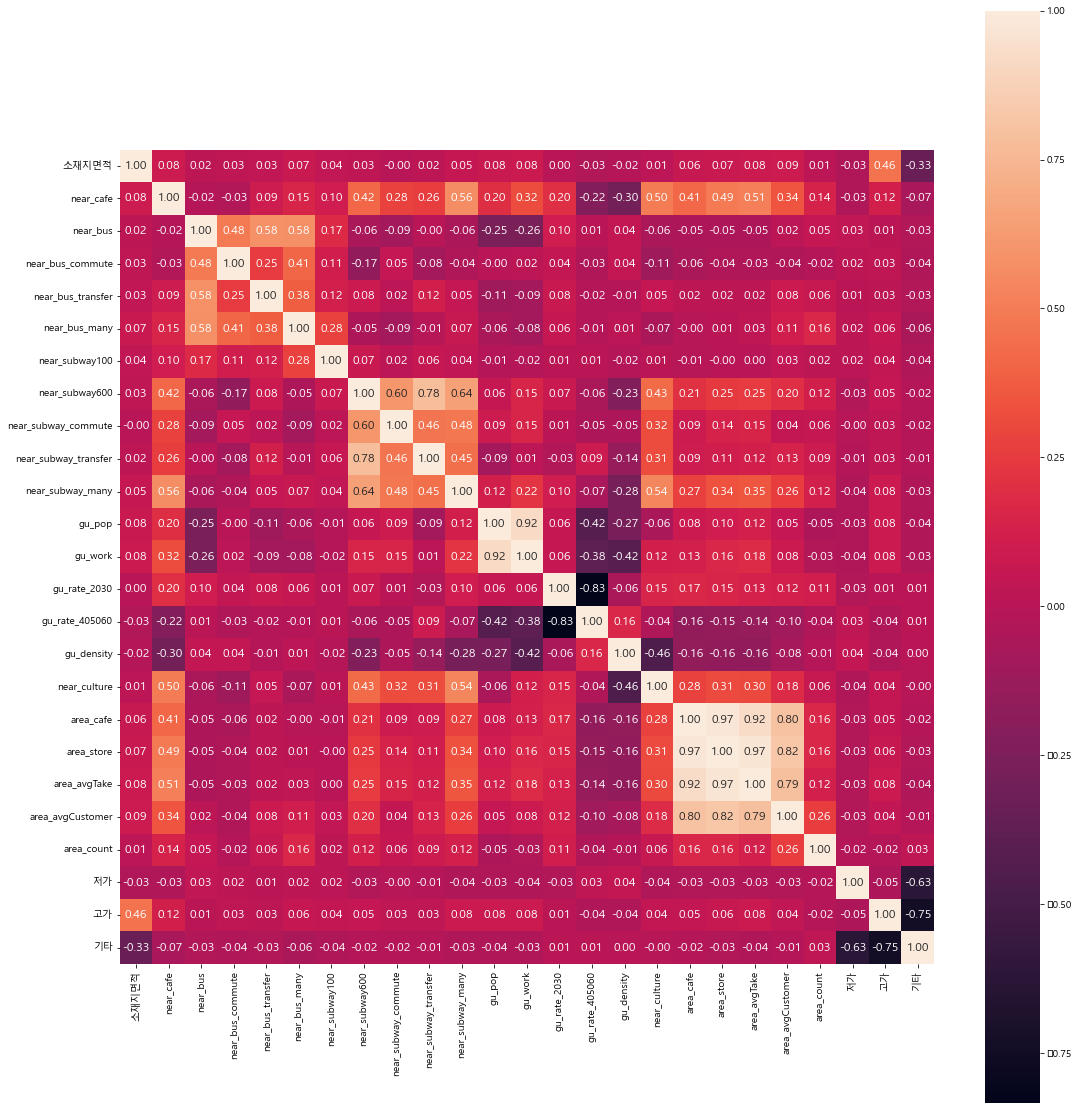

In [107]:
plt.figure(figsize=(15,15))
hm = sns.heatmap(df4_drop_target.corr,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':12},
                yticklabels=df4_drop_target.corr.columns,
                xticklabels=df4_drop_target.corr.columns)
plt.tight_layout()
plt.show()

In [113]:
df5_drop_target.corr=df5_drop_target.corr()

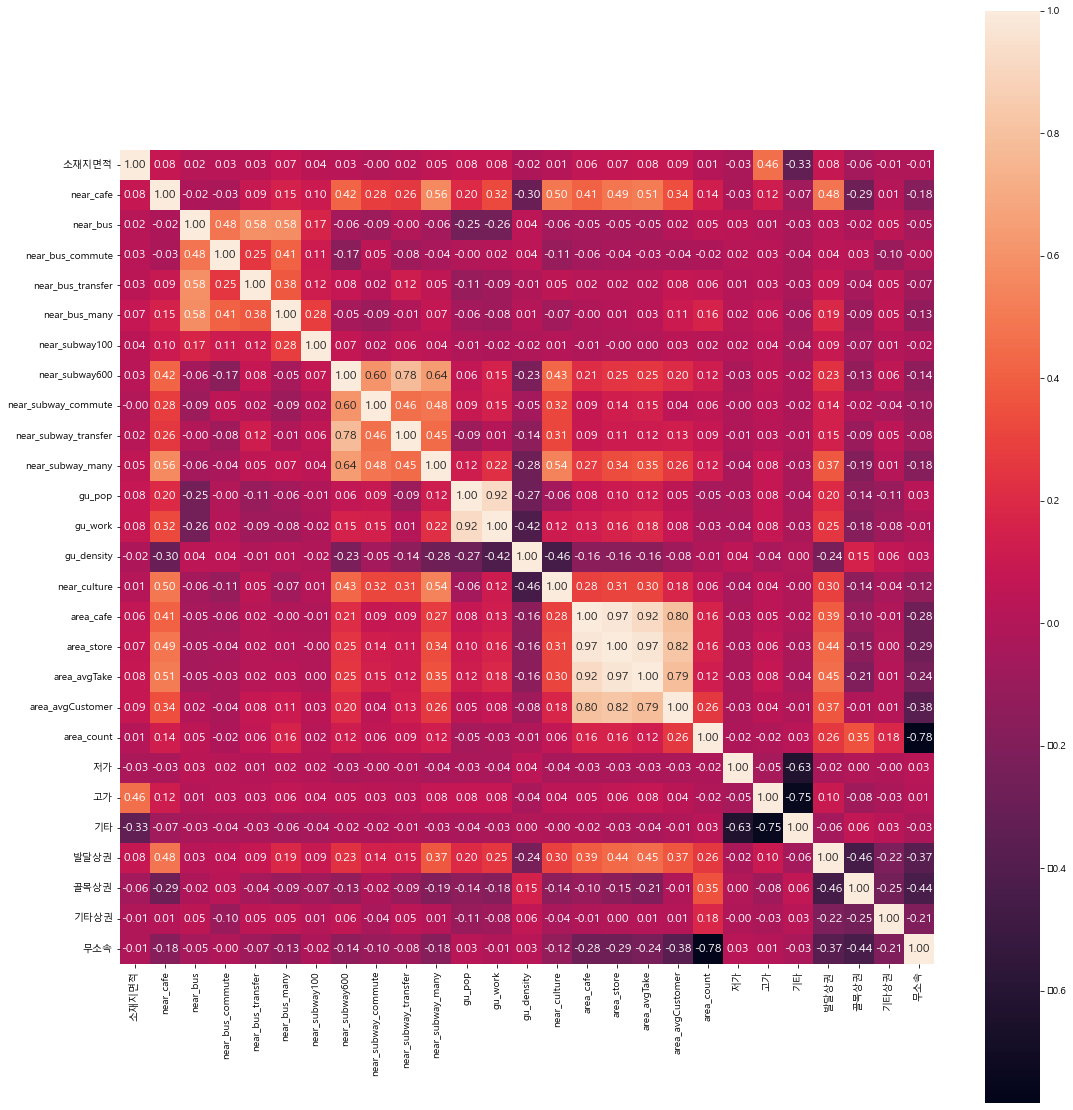

In [114]:
plt.figure(figsize=(16,16))
hm = sns.heatmap(df5_drop_target.corr,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':12},
                yticklabels=df5_drop_target.corr.columns,
                xticklabels=df5_drop_target.corr.columns)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='gu_pop', ylabel='gu_density'>

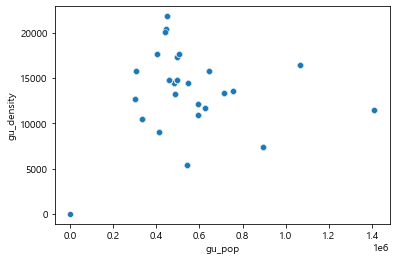

In [117]:
sns.scatterplot(x=df['gu_pop'],y=df['gu_density'])

In [153]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [149]:
from statsmodels.formula.api import ols

In [157]:
model =sm.OLS(df['target'],df[['소재지면적','near_cafe','near_cafe','near_bus_commute','near_bus_transfer',
            'near_bus_many','near_subway100','near_subway600','near_subway_commute','near_subway_transfer',
            'near_subway_many','gu_pop','gu_work','gu_rate_2030','gu_rate_405060','gu_density','near_culture',
            'area_cafe','area_store','area_avgTake','area_avgCustomer','area_count','저가','고가','기타',
            '발달상권','골목상권','기타상권','무소속']])

In [158]:
res = model.fit()

In [159]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     39.53
Date:                Thu, 30 Dec 2021   Prob (F-statistic):          1.56e-197
Time:                        14:29:48   Log-Likelihood:                -27636.
No. Observations:               42657   AIC:                         5.533e+04
Df Residuals:                   42630   BIC:                         5.556e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
소재지면적                    0.0004   4.03e-05      9.973      0.000       0.000       0.000
near_cafe               -0.0003      0.000     -1.424      0.154      -0.001    9.88e-05
near_cafe               -0.0003      0.000     -1.427      0.154      -0.001    9.83e-05
near_bus_commute         0.0054      0.002      3.200      0.001       0.002       0.009
near_bus_transfer       -0.0020      0.002     -1.081      0.280      -0.006       0.002
near_bus_many            0.0014      0.002      0.873      0.383      -0.002       0.004
near_subway100           0.0254      0.008      2.996      0.003       0.009       0.042
near_subway600          -0.0190      0.006     -3.049      0.002      -0.031      -0.007
near_subway_commute     -0.0004      0.005     -0.098      0.922      -0.009       0.008
near_subway_transfer     0.0403      0.005      8.077      0.000       0.031       0.050
near_subway_many        -0.0243      0.005     -5.126      0.000      -0.034      -0.015
gu_pop               -2.114e-07   2.12e-08     -9.957      0.000   -2.53e-07    -1.7e-07
gu_work               2.319e-07   3.53e-08      6.566      0.000    1.63e-07    3.01e-07
gu_rate_2030             0.5780      0.148      3.913      0.000       0.288       0.868
gu_rate_405060           0.6559      0.134      4.890      0.000       0.393       0.919
gu_density             1.27e-07   7.42e-07      0.171      0.864   -1.33e-06    1.58e-06
near_culture             0.0014      0.000      6.030      0.000       0.001       0.002
area_cafe                0.0021      0.001      3.761      0.000       0.001       0.003
area_store              -0.0015      0.001     -2.759      0.006      -0.003      -0.000
area_avgTake         -1.285e-12   4.61e-12     -0.279      0.780   -1.03e-11    7.75e-12
area_avgCustomer      2.494e-08   6.97e-09      3.576      0.000    1.13e-08    3.86e-08
area_count               0.0012      0.005      0.243      0.808      -0.009       0.011
저가                       0.2006      0.059      3.373      0.001       0.084       0.317
고가                       0.1574      0.059      2.648      0.008       0.041       0.274
기타                       0.1191      0.059      2.026      0.043       0.004       0.234
발달상권                     0.0964      0.045      2.162      0.031       0.009       0.184
골목상권                     0.1092      0.044      2.473      0.013       0.023       0.196
기타상권                     0.1390      0.045      3.122      0.002       0.052       0.226
무소속                      0.1324      0.044      2.990      0.003       0.046       0.219
==============================================================================
Omnibus:                   628214.472   Durbin-Watson:                   1.328
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7106.91